In [2]:
# car sales project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data=pd.read_csv(r"/Users/devgulati/Downloads/carsales.csv")
df=pd.DataFrame(data)
df

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [14]:
# fnding missing values
df.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [18]:
#removing missing values
df=df.dropna()

In [20]:
#removing duplicate values
df=df.drop_duplicates()

In [21]:
# standardizing column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [23]:
#feature engineering
df['car_age']=2025-df['year']
df

,brand,price,body,mileage,enginev,engine_type,registration,year,model,car_age
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,34
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,26
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,22
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,18
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,14
...,...,...,...,...,...,...,...,...,...,...
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,11
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,26
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520,40


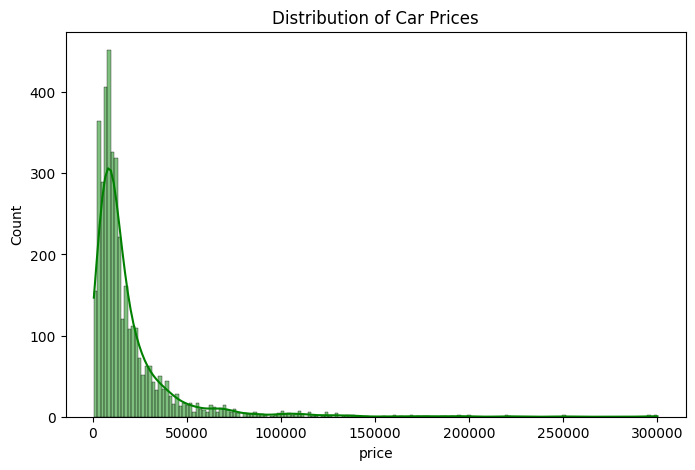

In [42]:
#univariable analysis
# Distribution of car prices
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], color='green', kde=True)
plt.title('Distribution of Car Prices')
plt.show()



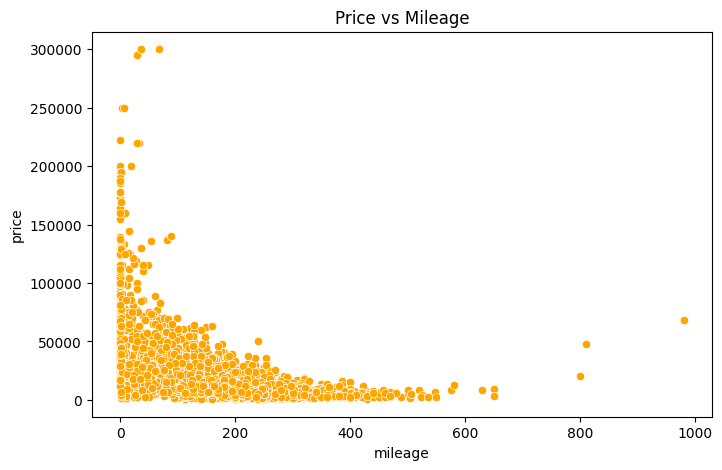

In [41]:
#bivariate analysis
# Price vs Mileage
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df,color='orange', x='mileage', y='price')
plt.title('Price vs Mileage')
plt.show()


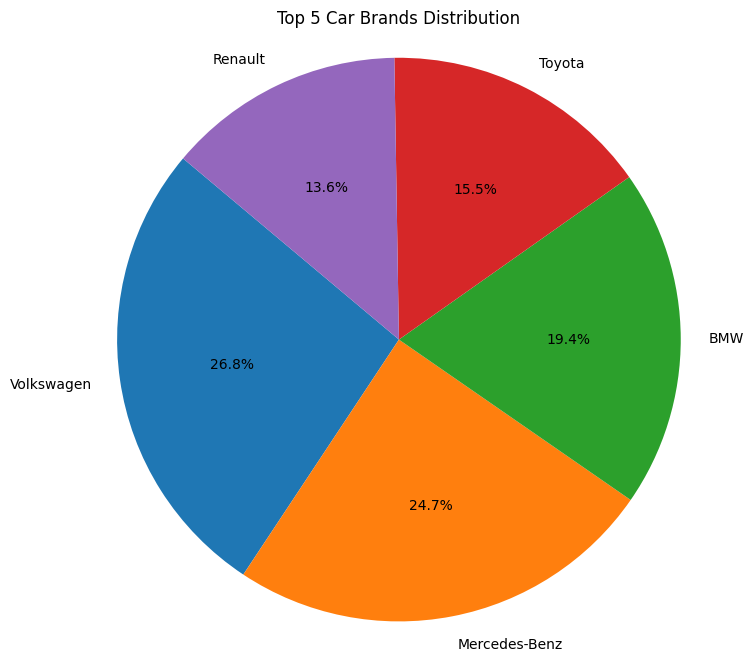

In [46]:
brand_counts = df['brand'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(brand_counts[:5], labels=brand_counts.index[:5], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Car Brands Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()

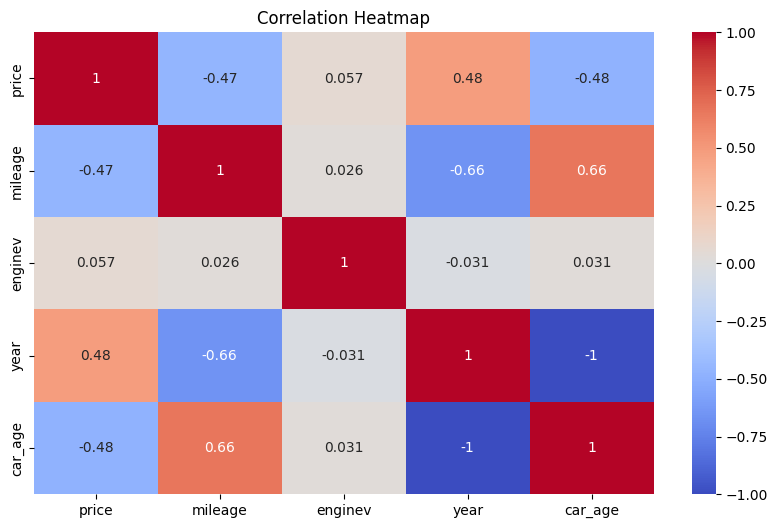

In [49]:
#correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/var/folders/_0/bt7jf4lx4bsbkkmhh6p7906c0000gn/T/ipykernel_67632/1484548149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="coolwarm")


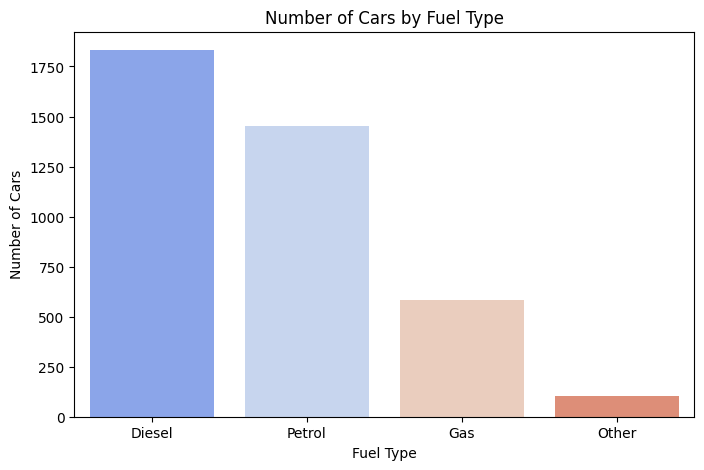

In [63]:
fuel_counts = df['engine_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=fuel_counts.index, y=fuel_counts.values, palette="coolwarm")
plt.title("Number of Cars by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.xticks(rotation=0)
plt.show()


## 🧾 Conclusion

After analyzing the car sales dataset using Exploratory Data Analysis and visualization techniques, here are the key insights:

- **Fuel Type Distribution:** The most common fuel type is Petrol, followed by Diesel. Electric and Hybrid vehicles are the least common in this dataset.
- **Price Distribution:** Car prices are right-skewed, with a majority of cars priced under a certain value (as seen in the histogram).
- **Engine Volume (EngineV):** Most cars have engine volumes around 2.0L to 2.5L.
- **Transmission & Body Type Trends:** Automatic transmission is slightly more common than manual. SUVs and Sedans are the most popular body types.
- **Price Relationships:** As expected, there is a visible decline in price with higher mileage, and newer cars (lower age) tend to be more expensive.
- **Top Brands:** The dataset is dominated by a few well-known brands.

These insights can help manufacturers, dealerships, or customers make better decisions when analyzing car sales patterns.

---
